In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import plotly.express as px
import pycountry
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_9764\1940932245.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Region", y="Happiness Score", data=dataset, palette="Set2")


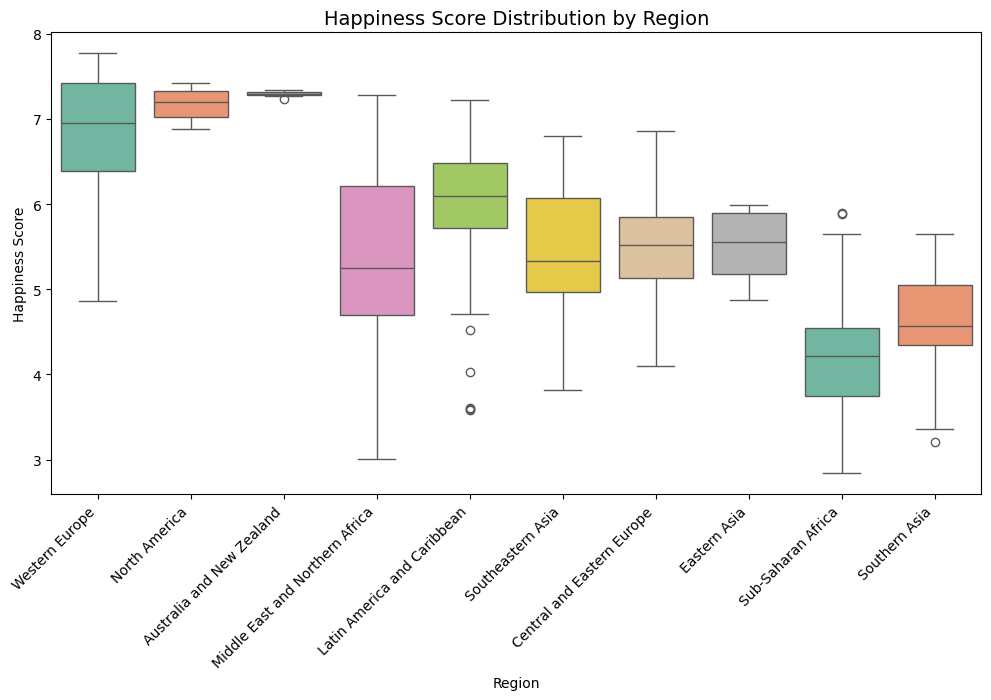

In [2]:
dataset=pd.read_csv(r"F:\What-Makes-a-Country-Happy\Data\Cleand_Dataset_World_Happiness.csv")
# Set figure size
plt.figure(figsize=(12,6))

# Create boxplot
sns.boxplot(x="Region", y="Happiness Score", data=dataset, palette="Set2")

# Rotate region names for readability
plt.xticks(rotation=45, ha="right")

# Add title and labels
plt.title("Happiness Score Distribution by Region", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Happiness Score")

plt.show()


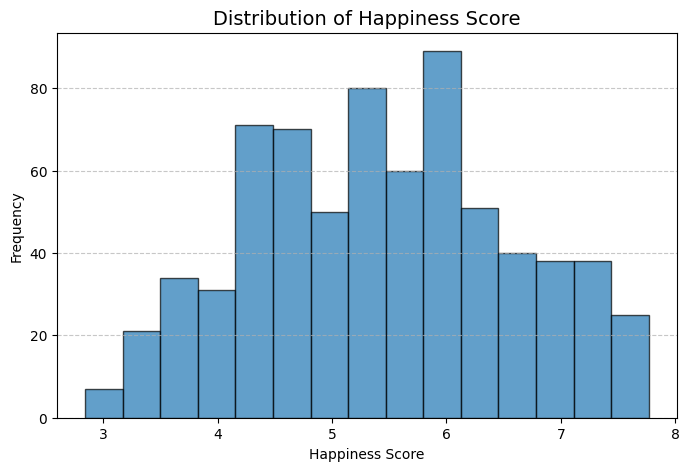

In [3]:


plt.figure(figsize=(8,5))
plt.hist(dataset['Happiness Score'], bins=15, edgecolor='black', alpha=0.7)
plt.title("Distribution of Happiness Score", fontsize=14)
plt.xlabel("Happiness Score")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


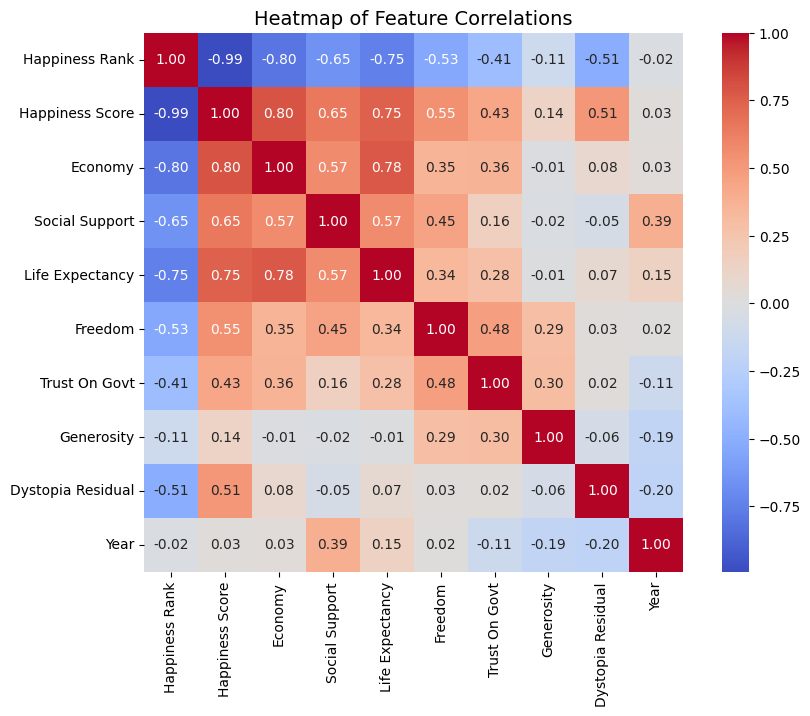

In [4]:

# Compute correlation matrix
corr = dataset.corr(numeric_only=True)

# Set up the matplotlib figure
plt.figure(figsize=(10,7))

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)

# Add title
plt.title("Heatmap of Feature Correlations", fontsize=14)
plt.show()


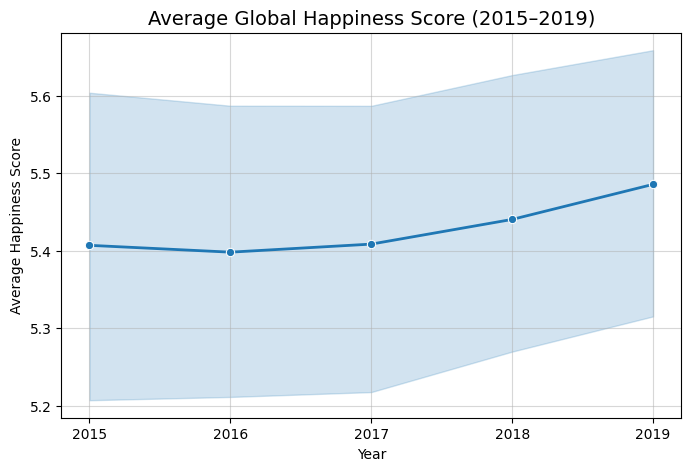

In [17]:
yearly_avg = dataset.groupby("Year")["Happiness Score"].mean().reset_index()
yearly_avg["Year"] = yearly_avg["Year"].astype(int)

plt.figure(figsize=(8,5))
sns.lineplot(x="Year", y="Happiness Score", data=dataset, marker="o", linewidth=2)
plt.title("Average Global Happiness Score (2015–2019)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average Happiness Score")
plt.xticks(yearly_avg["Year"])  # show only the actual years
plt.grid(alpha=0.5)
plt.show()



In [6]:
# Top 1 happiest and bottom 1 least happy countries for each year
top_bottom = dataset.groupby("Year").apply(
    lambda g: pd.DataFrame({
        "Top Country": [g.loc[g["Happiness Score"].idxmax(), "Country"]],
        "Top Score": [g["Happiness Score"].max()],
        "Bottom Country": [g.loc[g["Happiness Score"].idxmin(), "Country"]],
        "Bottom Score": [g["Happiness Score"].min()]
    })
).reset_index(level=0)

top_bottom


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_9764\2016760724.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_bottom = dataset.groupby("Year").apply(


,Year,Top Country,Top Score,Bottom Country,Bottom Score
0,2015,Switzerland,7.587,Togo,2.839
0,2016,Denmark,7.526,Burundi,2.905
0,2017,Norway,7.537,Burundi,2.905
0,2018,Finland,7.632,Burundi,2.905
0,2019,Finland,7.769,Afghanistan,3.203


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_9764\1132792251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Happiness Score", y="Region", data=region_avg, palette="viridis")


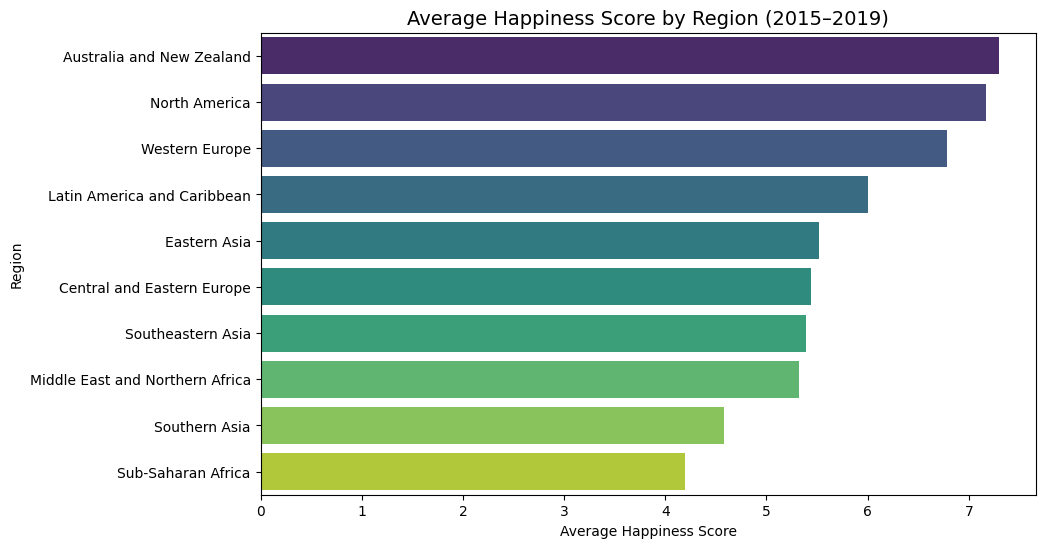

In [7]:
# Average Happiness Score per Region (across all years)
region_avg = dataset.groupby("Region")["Happiness Score"].mean().reset_index().sort_values(by="Happiness Score", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="Happiness Score", y="Region", data=region_avg, palette="viridis")
plt.title("Average Happiness Score by Region (2015–2019)", fontsize=14)
plt.xlabel("Average Happiness Score")
plt.ylabel("Region")
plt.show()


In [8]:
# Average score by Region for 2015 and 2018
region_change = dataset[dataset["Year"].isin([2015, 2019])].groupby(["Region", "Year"])["Happiness Score"].mean().unstack()

# Calculate improvement (2019 - 2015)
region_change["Change"] = region_change[2019] - region_change[2015]

# Find the region with max improvement and max decline
most_improved = region_change["Change"].idxmax()
most_declined = region_change["Change"].idxmin()

print("📈 Most Improved Region:", most_improved, "(", region_change.loc[most_improved, "Change"], ")")
print("📉 Most Declined Region:", most_declined, "(", region_change.loc[most_declined, "Change"], ")")

# Optional: Show all regions with change
print("\nRegional Changes (2015 → 2019):")
print(region_change.sort_values("Change", ascending=False))


📈 Most Improved Region: Sub-Saharan Africa ( 0.2599032258064513 )
📉 Most Declined Region: Latin America and Caribbean ( -0.19474999999999998 )

Regional Changes (2015 → 2019):
Year                                 2015      2019    Change
Region                                                       
Sub-Saharan Africa               4.120419  4.380323  0.259903
Central and Eastern Europe       5.344571  5.571786  0.227214
Western Europe                   6.739350  6.898400  0.159050
Eastern Asia                     5.496250  5.564250  0.068000
Australia and New Zealand        7.285000  7.267500 -0.017500
Southeastern Asia                5.372625  5.333375 -0.039250
Southern Asia                    4.580857  4.526857 -0.054000
Middle East and Northern Africa  5.330789  5.237000 -0.093789
North America                    7.273000  7.085000 -0.188000
Latin America and Caribbean      6.137300  5.942550 -0.194750


In [9]:
# Find happiest countries (top 10%)
df=dataset
threshold = df["Happiness Score"].quantile(0.90)
happiest = df[df["Happiness Score"] >= threshold]
others   = df[df["Happiness Score"] < threshold]

# Compare average dystopia residual
avg_happiest = happiest["Dystopia Residual"].mean()
avg_others   = others["Dystopia Residual"].mean()

print("Avg Dystopia Residual (Top 10% Happiest Countries):", avg_happiest)
print("Avg Dystopia Residual (Other Countries):", avg_others)

if avg_happiest < avg_others:
    print("✅ Happiest countries tend to have LOWER Dystopia Residual.")
else:
    print("❌ Happiest countries do NOT have lower Dystopia Residual.")


Avg Dystopia Residual (Top 10% Happiest Countries): 2.4909066713037618
Avg Dystopia Residual (Other Countries): 1.9636542023190637
❌ Happiest countries do NOT have lower Dystopia Residual.


📈 Happiest Country (2015–2019 Average): Denmark with score 7.546
📉 Least Happy Country (2015–2019 Average): Burundi with score 3.079


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_9764\4073077193.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Happiness Score", y="Country", data=country_avg.head(5), palette="Blues_r")


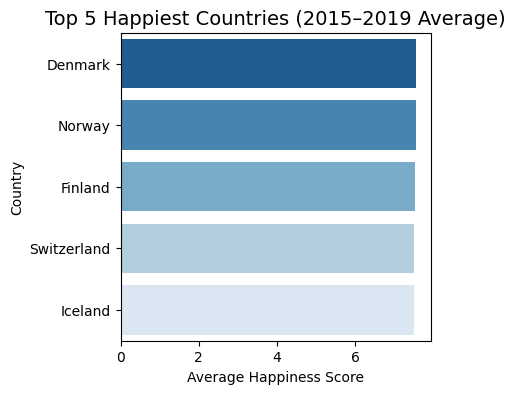

C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_9764\4073077193.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Happiness Score", y="Country", data=country_avg.tail(5), palette="Reds")


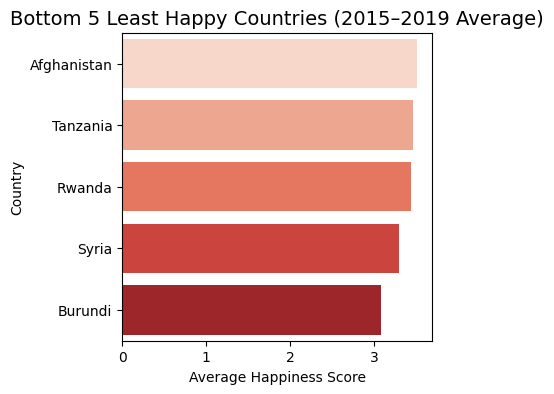

In [11]:
# Average score across years
country_avg = df.groupby("Country")["Happiness Score"].mean().reset_index().sort_values(by="Happiness Score", ascending=False)

# Print the top and worst country
top_country = country_avg.iloc[0]
worst_country = country_avg.iloc[-1]

print("📈 Happiest Country (2015–2019 Average):", top_country["Country"], "with score", round(top_country["Happiness Score"], 3))
print("📉 Least Happy Country (2015–2019 Average):", worst_country["Country"], "with score", round(worst_country["Happiness Score"], 3))

# Plot Top 15
plt.figure(figsize=(4,4))
sns.barplot(x="Happiness Score", y="Country", data=country_avg.head(5), palette="Blues_r")
plt.title("Top 5 Happiest Countries (2015–2019 Average)", fontsize=14)
plt.xlabel("Average Happiness Score")
plt.ylabel("Country")
plt.show()

# Plot Bottom 15
plt.figure(figsize=(4,4))
sns.barplot(x="Happiness Score", y="Country", data=country_avg.tail(5), palette="Reds")
plt.title("Bottom 5 Least Happy Countries (2015–2019 Average)", fontsize=14)
plt.xlabel("Average Happiness Score")
plt.ylabel("Country")
plt.show()


        Country  Happiness Score         Happiness_Level
0   Afghanistan           3.5128   Low Happiness Profile
1       Albania           4.7126   Mid Happiness Profile
2       Algeria           5.6676   Mid Happiness Profile
3     Argentina           6.4594   Mid Happiness Profile
4       Armenia           4.3932   Mid Happiness Profile
5     Australia           7.2762  High Happiness Profile
6       Austria           7.1420  High Happiness Profile
7    Azerbaijan           5.2292   Mid Happiness Profile
8       Bahrain           6.1138  High Happiness Profile
9    Bangladesh           4.5802   Low Happiness Profile
10      Belarus           5.5980   Mid Happiness Profile
11      Belgium           6.9214  High Happiness Profile
12        Benin           3.9010   Low Happiness Profile
13       Bhutan           5.1248   Mid Happiness Profile
14      Bolivia           5.8132   Mid Happiness Profile


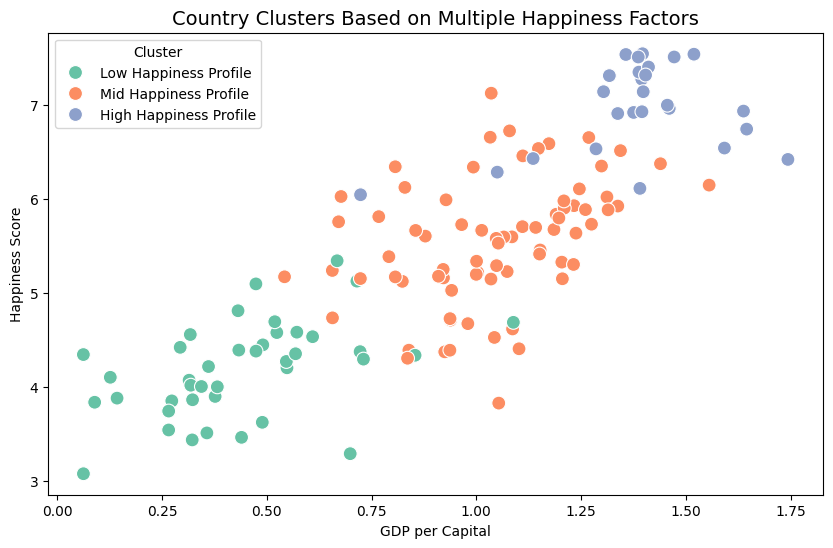

In [12]:

# Select features for clustering (you can add/remove depending on your dataset)
features = ["Happiness Score", "Economy", 
            "Social Support", "Freedom", 
            "Generosity", "Trust On Govt", 
            "Life Expectancy"]

# Take country-wise averages across years
country_features = df.groupby("Country")[features].mean().reset_index()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_features[features])

# Apply KMeans clustering (choose 3 clusters: High, Mid, Low happiness profiles)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
country_features["Cluster"] = kmeans.fit_predict(X_scaled)

# Assign cluster labels based on average happiness score per cluster
cluster_means = country_features.groupby("Cluster")["Happiness Score"].mean().sort_values()
labels = {cluster_means.index[0]: "Low Happiness Profile",
          cluster_means.index[1]: "Mid Happiness Profile",
          cluster_means.index[2]: "High Happiness Profile"}

country_features["Happiness_Level"] = country_features["Cluster"].map(labels)

# Print few sample results
print(country_features[["Country", "Happiness Score", "Happiness_Level"]].head(15))

# Plot clusters by GDP vs Happiness Score
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="Economy", y="Happiness Score",
    hue="Happiness_Level", data=country_features, palette="Set2", s=100
)
plt.title("Country Clusters Based on Multiple Happiness Factors", fontsize=14)
plt.xlabel("GDP per Capital")
plt.ylabel("Happiness Score")
plt.legend(title="Cluster")
plt.show()


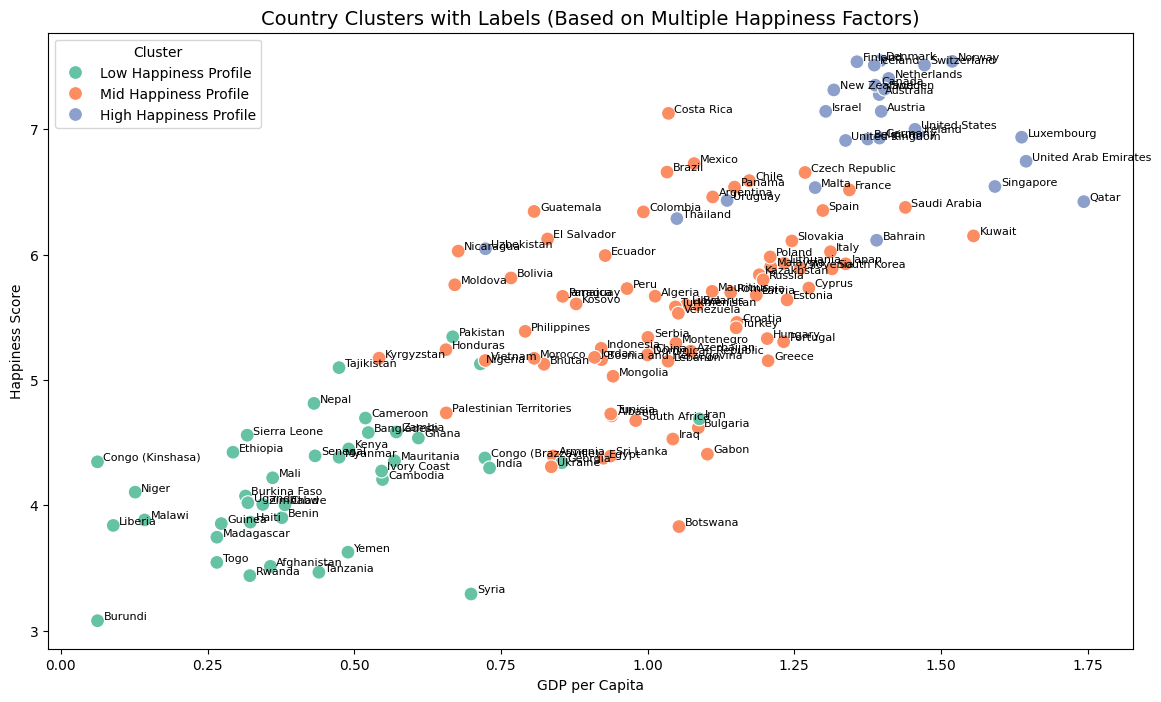

In [13]:


# Select features for clustering
features = ["Happiness Score", "Economy", 
            "Social Support", "Freedom", 
            "Generosity", "Trust On Govt", 
            "Life Expectancy"]

# Country-wise averages across years
country_features = df.groupby("Country")[features].mean().reset_index()

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(country_features[features])

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
country_features["Cluster"] = kmeans.fit_predict(X_scaled)

# Map clusters to labels
cluster_means = country_features.groupby("Cluster")["Happiness Score"].mean().sort_values()
labels = {cluster_means.index[0]: "Low Happiness Profile",
          cluster_means.index[1]: "Mid Happiness Profile",
          cluster_means.index[2]: "High Happiness Profile"}

country_features["Happiness_Level"] = country_features["Cluster"].map(labels)

# Scatterplot with annotations
plt.figure(figsize=(14,8))
sns.scatterplot(
    x="Economy", y="Happiness Score",
    hue="Happiness_Level", data=country_features, palette="Set2", s=100
)

# Add country names as labels
for i, row in country_features.iterrows():
    plt.text(row["Economy"]+0.01,   # small offset in x
             row["Happiness Score"]+0.01,            # small offset in y
             row["Country"], fontsize=8)

plt.title("Country Clusters with Labels (Based on Multiple Happiness Factors)", fontsize=14)
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(title="Cluster")
plt.show()


In [14]:
df=pd.read_csv(r"F:\What-Makes-a-Country-Happy\Data\Cleand_Dataset_World_Happiness.csv")

In [15]:

# Prepare data for map
map_data = country_features.copy()
map_data["ISO_Code"] = map_data["Country"].map(
    lambda x: pycountry.countries.lookup(x).alpha_3 if x in [c.name for c in pycountry.countries] else None
)

# Drop rows where ISO_Code couldn't be found
map_data = map_data.dropna(subset=["ISO_Code"])

# Choropleth with clusters
fig = px.choropleth(
    map_data,
    locations="ISO_Code",
    color="Happiness_Level",
    hover_name="Country",
    hover_data={"Happiness Score": True, "ISO_Code": False},
    color_discrete_map={
        "Low Happiness Profile": "red",
        "Mid Happiness Profile": "Pink",
        "High Happiness Profile": "green"
    },
    projection="natural earth",
    title="Global Clusters of Happiness (2015–2019 Average)"
)

fig.show()


C:\Users\ATANU MANNA\AppData\Local\Temp\ipykernel_9764\1128717067.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




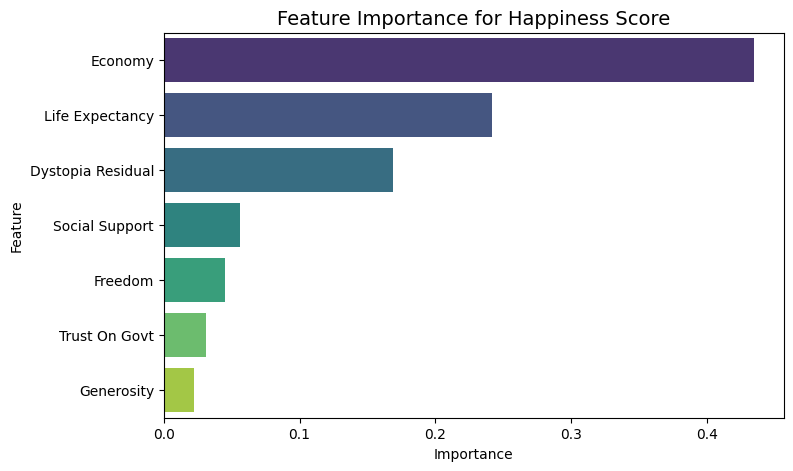

             Feature  Importance
0            Economy    0.435038
5    Life Expectancy    0.241850
6  Dystopia Residual    0.168707
1     Social Support    0.055807
2            Freedom    0.045116
4      Trust On Govt    0.030956
3         Generosity    0.022527


In [16]:


# Features and target
features = ["Economy", "Social Support", "Freedom", 
            "Generosity", "Trust On Govt", "Life Expectancy","Dystopia Residual"]
X = df[features]
y = df["Happiness Score"]

# Train a Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X, y)

# Feature importance
importance = pd.DataFrame({
    "Feature": features,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=importance, palette="viridis")
plt.title("Feature Importance for Happiness Score", fontsize=14)
plt.show()

print(importance)
